# Analysis Target and categorical

In [18]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data/cookies.csv')

In [4]:
data.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


Ordinal
Target: 
quality
aestetic
Categorical:
Butter Type 
Mixins

## Ordinals

### TARGET

The target variable is QUALITY, a Numeric Ordinal var.

In [10]:
data.quality.isnull().sum()

0

There is no nulls

In [8]:
data.quality.describe()

count    5198.000000
mean        7.325125
std         1.302780
min         3.000000
25%         7.000000
50%         8.000000
75%         8.000000
max        11.000000
Name: quality, dtype: float64

In [16]:
data.quality.value_counts().sort_values(ascending=False)

8     1780
7     1323
9      707
6      617
5      577
10     137
4       44
3        8
11       5
Name: quality, dtype: int64

The target is unbalanced

In [26]:
target = data.quality.value_counts().reset_index()

In [30]:
target.columns = ['quality', 'count']

In [31]:
target.head()

,quality,count
0,8,1780
1,7,1323
2,9,707
3,6,617
4,5,577


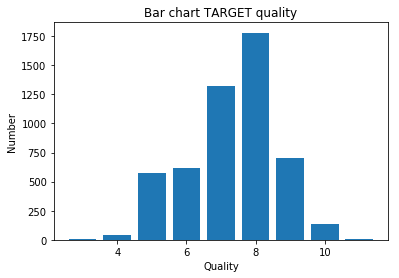

In [63]:
plt.bar(target['quality'], target['count'])
plt.xlabel(r"Quality")
plt.ylabel(r"Number")
plt.title(r"Bar chart TARGET quality")
plt.show()

### Aestetic appeal

Aesthetic appeal is a numeric ordinal variable

In [36]:
data['aesthetic appeal'].isnull().sum()

0

There is no nulls

In [37]:
data['aesthetic appeal'].describe()

count    5198.000000
mean        3.000577
std         0.024019
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: aesthetic appeal, dtype: float64

In [39]:
data['aesthetic appeal'].value_counts().sort_values(ascending=False)

3    5195
4       3
Name: aesthetic appeal, dtype: int64

The aestetic appeal is only 3 or 4. And 4 is very unsignificat. We will check if the 4 is related to any of the target labels.

In [42]:
aestetic = data['aesthetic appeal'].value_counts().reset_index()

In [45]:
aestetic.columns = ['aestetic', 'count']

In [48]:
aestetic.head()

,aestetic,count
0,3,5195
1,4,3


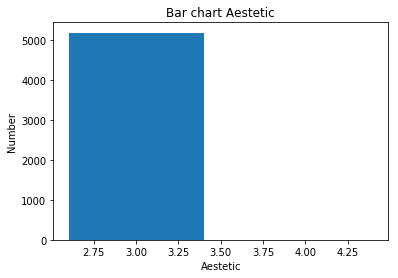

In [64]:
plt.bar(aestetic['aestetic'], aestetic['count'])
plt.xlabel(r"Aestetic")
plt.ylabel(r"Number")
plt.title(r"Bar chart Aestetic")
plt.show()

In [65]:
data.groupby(['aesthetic appeal','quality'])['diameter'].count()

aesthetic appeal  quality
3                 3             8
                  4            44
                  5           577
                  6           616
                  7          1322
                  8          1780
                  9           706
                  10          137
                  11            5
4                 6             1
                  7             1
                  9             1
Name: diameter, dtype: int64

## Categorical

### Butter type

In [70]:
data['butter type'].describe(include=['O'])

count       5198
unique         2
top       melted
freq        3920
Name: butter type, dtype: object

In [71]:
butter = data['butter type'].value_counts().reset_index()

In [72]:
butter.columns = ['butter', 'count']

In [73]:
butter.head()

,butter,count
0,melted,3920
1,cubed,1278


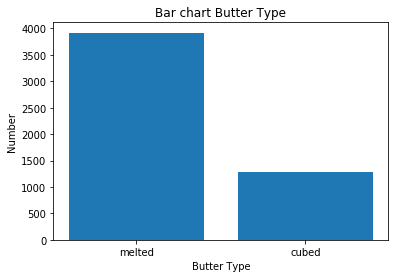

In [74]:
plt.bar(butter['butter'], butter['count'])
plt.xlabel(r"Butter Type")
plt.ylabel(r"Number")
plt.title(r"Bar chart Butter Type")
plt.show()

Relation with target

In [75]:
data.groupby(['butter type','quality'])['diameter'].count()

butter type  quality
cubed        3             8
             4            44
             5           561
             6           492
             7           158
             8            15
melted       5            16
             6           125
             7          1165
             8          1765
             9           707
             10          137
             11            5
Name: diameter, dtype: int64

We can observe that a higher quality is related with Melted Butter

### Mixins

In [76]:
data['mixins'].describe(include=['O'])

count          5196
unique           13
top       chocolate
freq           1893
Name: mixins, dtype: object

In [81]:
mixins = data['mixins'].value_counts().reset_index()

In [82]:
mixins.columns = ['mixins', 'count']

In [83]:
mixins

,mixins,count
0,chocolate,1893
1,raisins,1200
2,"chocolate, oats",749
3,"nuts, chocolate",521
4,"nuts,raisins",333
5,"nuts, oats, chocolate",295
6,"nuts, oats",107
7,"chocolate, peanut butter",52
8,"raisins, oats",24
9,peanut butter,15


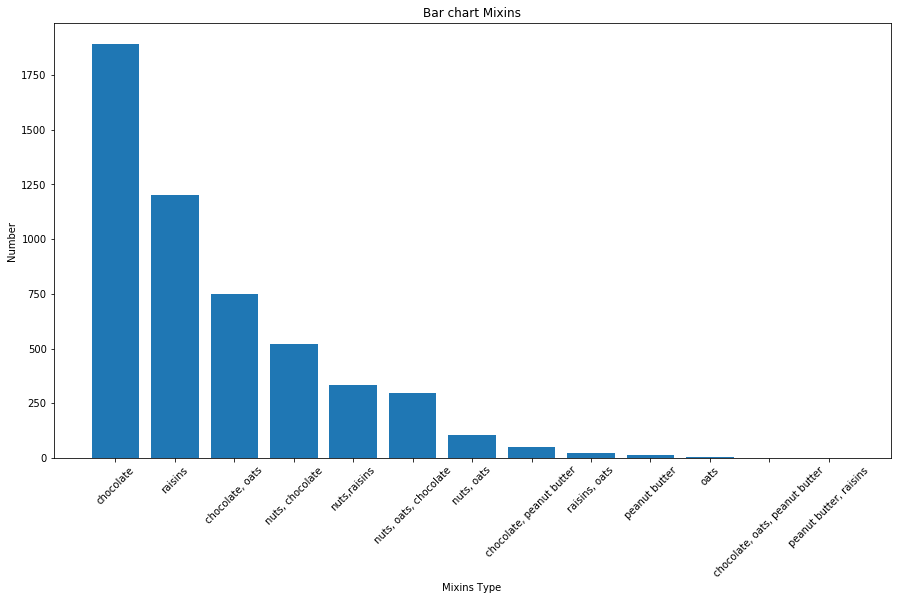

In [96]:
plt.figure(figsize=(15,8))
plt.bar(mixins['mixins'], mixins['count'])
plt.xticks(rotation=45)
plt.xlabel(r"Mixins Type")
plt.ylabel(r"Number")
plt.title(r"Bar chart Mixins")
plt.show()

Relation with target

In [101]:
data.groupby(['mixins','quality'])['diameter'].count()

mixins                          quality
chocolate                       4            1
                                5           21
                                6           77
                                7          552
                                8          901
                                9          284
                                10          54
                                11           3
chocolate, oats                 5            4
                                6           17
                                7          120
                                8          390
                                9          186
                                10          32
chocolate, oats, peanut butter  4            1
                                5            1
chocolate, peanut butter        3            1
                                4            6
                                5           25
                                6           13
                    

In the next step we need to separate the mixins by columns